

# Projet 1: Analyse et exploration des données du site TMDB

## Table des matières
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#aed">Analyse exploratoire des données</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Description de l’ensemble de données 
 
> Notre objectif dans cette étude est d'étudier des données de films du site TMDB. Ces données de films repertorient les informations sur les films produits entre 1960 et 2015. Cet ensemble de données contient des informations sur 10 000 films collectés à partir de The Movie Database (TMDb), y compris les évaluations des utilisateurs et les revenus.Lien des données: [cliquez-ici](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)


### Ci-dessous un tableau repertoriant les noms des colonnes et leur signification : 

<table>

<tr>    <td> Variables </td>                   <td> Signification<td>   </tr>                

  <tr>   <td>  id </td>                  <td> identifiant du film </td> </tr>                  
 <tr>   <td> imdb_id </td>	          <td>Identifiant du film du site IMDB </td> </tr>            
  <tr> <td>  popularity </td>        <td> Popularité du film  </td> </tr>                                
  <tr> <td>   Budjet  </td>            <td>  Budget Aloué au film  </td>  </tr>                  
 <tr>  <td>  revenue  </td>            <td> Revenu engendré par le film </td> </tr>                           
 <tr>  <td>  original_title</td>          <td> titre originel du film </td> </tr>                   	                
 <tr>  <td>     cast   </td>             <td> Acteurs  ayant participé au film  </td> </tr>       
 <tr>  <td>    homepage </td>           <td> le site web du film  </td>  </tr>                   
 <tr>  <td>    director </td>           <td> Réalisateur du film   </td>  </tr>                 
 <tr>   <td>   tagline  </td>           <td> Phrase pour attirer l'attention des spectateurs </td> </tr> 
 <tr>    <td>  keywords </td>          <td>  Mots clés </td>  </tr>                            
 <tr>   <td>  overview  </td>          <td>  Résumé du film  </td>  </tr>                   
  <tr>   <td>  runtime  </td>          <td>  Temps de lecture du film  </td> </tr>                 
  <tr>    <td> genres	</td>          <td>  Genre du film </td> </tr>                            
<tr>  <td> production_companies </td>    <td>  Compagnies de production du film </td> </tr>         
  <tr>   <td> release_date  </td>       <td> Date de réalisation du film  </td>  </tr>            
 <tr>    <td> vote_count  </td>         <td> Nombre de vote  </td>   </tr>                        
 <tr>    <td>  vote_average </td>       <td> Moyennes des votes </td>  </tr>                          
 <tr>    <td>  release_year  </td>      <td> Années de realisation du film </td> </tr>            
  
<tr> <td> budget_adj </td>   <td>budget du film associé en termes de dollars 2010, en tenant compte de l’inflation au fil du temps</td></tr> 	        
  <tr>  <td> revenue_adj </td>    <td>revenue du film associé en termes de dollars 2010, en tenant compte de l’inflation au fil du temps</td> </tr> 
    
</table>



### Dans ce projet, nous allons répondre aux questions suivantes:
>
- Quels genres de films sont les plus populaires d’année en année?
- Quels types de propriétés sont associés aux films qui ont des revenus élevés?

In [20]:
# importation des bibliothèques nécéssaires pour notre analyse.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# Mise à niveau pandas pour utiliser la fonction dataframe.explode().
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



### Propriétes Génrales


In [21]:
# Chragement de la base de donnée et affichage des 5 primières lignes. 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Remarque**: En visualisant les données on remarque effectivement que comme c'est décrit dans la vue d'ensemble des données que Certaines colonnes, comme 'cast' , 'genres', 'production_companies' contiennent plusieurs valeurs séparées par un tuyau (|) caractères.

In [24]:
# Affichons l'ensemble des variables compris dans la base de données
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


**Remarque**: Il y'a certaines colonnes comme "id", "imdb_id", "original_title", "homepage", "tagline" "overview" et "keywords"
qui ne nous apportent pas grande informations pouvant servir à notre analyse, nous allons essayer des les nettoyer dans la partie nettoyage des données.

In [25]:
#affichage du nombre de lignes et de colonnes ainsi que les types des variables 
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Remarque**: 

In [26]:
#valeurs uniques dans les données
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [27]:
# Valeur manquantes:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Remarque** : Nous remarquons certaines colonnes comme "homepage", "director", "tagline" etc... contiennent des valeurs manquantes, Dans la section suivante nous allons traiter l'ensembles de ces valeurs manquantes par la methode des moyennes.

In [28]:
# Statistiques descriptives 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Commentaire**: 
- Nous remarquons au prime à bord que certaines colonnes comme par exemple "Budget", "revenue", "runtime" etc... ont une valeur minimale de 0, On pourrait toute fois choisire de supprimer ces valeurs pour ne pas qu'elles impactent nos analyses.  

- Alors, selons les statistiques, il ya des films qui ont connus un succès phénomenale par exemple (le max de "popularity" qui est de 33 alors que la moyenne tourne autours de 0,64 ), si nous voyons aussi le nombre de vote. Nous devons tenir compte des ces valeurs aberrantes lors de l'ananlyse.

- Il ya aussi des films qui on depenser un budget colausal et d'autres on engendré des gros revenus, nous devons egalement tenir compte de ces valeurs abérrantes alors de nos analyses.


### Nettoyage des données
> 
Dans la partie visualisation des données, nous avons decéler un certains nombres de problèmes que contient le jeu de donnée.
Dans cette partie nettoyage des données, nous allons esssayer de corrigers ces problèmes.
 

In [22]:
#Nous allons commmencer par nettoyer les colonnes qui ne nous seront pas utile dans l'analyse.
#"id", "imdb_id", "original_title","revenue","Budget", "homepage","director" "tagline" "overview" et "keywords"

df.drop(df.columns[[0, 1, 3, 4, 5, 7, 8, 9, 11, 10]], axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   cast                  10790 non-null  object 
 2   runtime               10866 non-null  int64  
 3   genres                10843 non-null  object 
 4   production_companies  9836 non-null   object 
 5   release_date          10866 non-null  object 
 6   vote_count            10866 non-null  int64  
 7   vote_average          10866 non-null  float64
 8   release_year          10866 non-null  int64  
 9   budget_adj            10866 non-null  float64
 10  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


**Remarque**: 
- Nous voyons bien que l'ensembles de ces colonnes unitule à notre analyse ont été supprimés.
- Nous avons décidé de supprimer le revenue et le budjet initial parceque on a dans notre jeu de donnée un revenu et budjet actualisé.  

In [5]:
# Voir le nombre de valeur manquantes dans les colonnes.
df.isnull().sum()

popularity                 0
cast                      76
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Remarques**: Nous voyons que les colonnes comme "cast", "genres" et "production_companies" ont des valeurs manquantes dans le jeu de données

<AxesSubplot:>

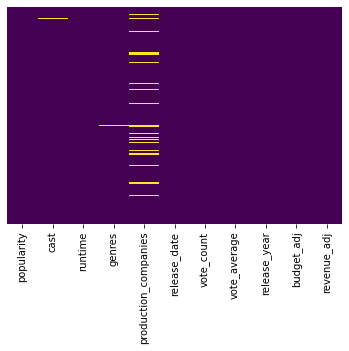

In [6]:
# nous allons visualiser à l'aide d'un graphique les données manquantes pour voir comment les gerer.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
df.shape

(10866, 11)

In [24]:
#Nous allons maintenant supprimer toutes les lignes contenant des aleurs manquantes.
df.dropna(how='any', inplace=True)

In [25]:
df.shape

(9792, 11)

**Remarque**: Nous voyons que de 10866 lignes, nous sommes passé à 9792 et nous n'avons pas perdu trop de données pouvant influencer notre analyse donc on peut garder cette méthode de néttoyage des données.

In [7]:
#Afficher les données manquantes 
df.isnull().sum()

popularity              0
cast                    0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

**Commentaire**: Notre jeu de données ne contient plus de données manquantes

In [26]:
#Nous allons maintenant voir les lignes dupliquées.
sum(df.duplicated())

1

In [27]:
#On a Une lignes dupliquée donc nous allons la supprimer
df.drop_duplicates(inplace=True)

In [28]:
sum(df.duplicated())

0

**Remarque**: Nous voyons que nous n'avons plus de données manquantes dans notre jeu de données.

In [29]:
#recodage des colonnes "cast", "genres" et "production_companies"

# Colonne genre 
L_g = []
for i in df['genres']:
    i=i.split('|')
    L_g.append(i[0])
df['genres_rcd']=L_g

**Commentaire**: Dans le code ci-dessus, nous avons recoder la colonne "genre", nous avons remarque que cette colonne contenait plusieurs valeurs separées par des (|) donc nous avons décidé dans notre analyse que nous prendrons que la première valeur que nous allons faire l'analyse avec. Et donc nous avons recoder notre variable "genres" en "genres_rcd". 

In [30]:
#Nous allons repeter la même chose pour les colonnes "cast" et "productions_companies"


In [31]:
#colonne "cast"

L_c = []
for i in df['cast']:
    i=i.split('|')
    L_c.append(i[0])
df['cast_rcd']=L_c

In [32]:
#colonne "productions_companies"

L_pc = []
for i in df['production_companies']:
    i=i.split('|')
    L_pc.append(i[0])
df['productions_companies_rcd']=L_pc

In [14]:
df.head()

,popularity,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_rcd,cast_rcd,productions_companies_rcd
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Universal Studios
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,Village Roadshow Pictures
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Summit Entertainment
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Harrison Ford,Lucasfilm
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Vin Diesel,Universal Pictures


**Remarque**: Nous pouvons distinguer clairement "genres_rcd", "cast_rcd" et "production_companies" qui se sont ajoutés à notree jeu de données et qui contiennent des valeurs bien claires.

<a id='aed'></a>
## Analyse exploratoire des données



### Question de recherche 1 : Quels genres de films sont les plus populaires d’année en année?

> Pour notre première question, nous allons utiliser les variables "genres", "popularity" et "release_year" pour y repondre mais nous  avons remarqué que nos variables sont des variables qualitatives ("genres") et quantitatives("popularity" et "release_year".

> Nous allons commencer à faire des statistiques univariées pour ces variables pour voir comment elles se présentent.

In [15]:
# Voir le nombre de genres de film
df['genres_rcd'].value_counts()


Drama              2226
Comedy             2087
Action             1480
Horror              853
Adventure           550
Thriller            474
Crime               361
Animation           348
Documentary         269
Fantasy             253
Science Fiction     197
Romance             161
Family              128
Mystery             118
Music                80
TV Movie             62
War                  57
Western              42
History              39
Foreign               6
Name: genres_rcd, dtype: int64

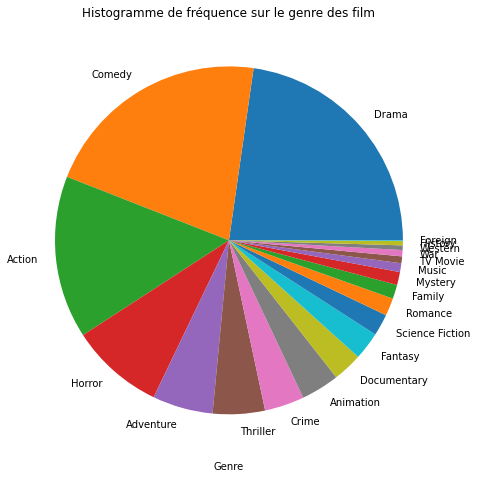

In [45]:
#nous pouvons visualiser cela à l'aide d'un diagramme circulaire
df['genres_rcd'].value_counts().plot(kind='pie', figsize =(10,8));
plt.title ('Histogramme de fréquence sur le genre des film')
plt.xlabel ('Genre')
plt.ylabel('')
plt.show ()

**Commentaire**: ICI nous aurions pu choisir le diagramme en batons pour faire notre représentation mais ce diagramme nous permet de voir et de se situer rappidement sur le genre de film les plus populaire.

**Remarque**: Nous voyons clairement que le genres de films qui ont plus de succès sont "drama", "comedy", "action", "Horror"

In [28]:
#Popularité moyenne
df['popularity'].mean()

0.6936545218057399

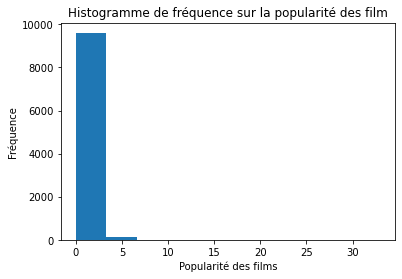

In [61]:
#distribution de la popularité
df['popularity'].plot(kind = 'hist')
plt.title ('Histogramme de fréquence sur la popularité des film')
plt.xlabel ('Popularité des films')
plt.ylabel ('Fréquence')
plt.show ()

**Remarque**: On constate que les films noté de 0 à 5 sont les plus populaires

In [29]:
#année moyenne
df['release_year'].mean()

2000.8927586559084

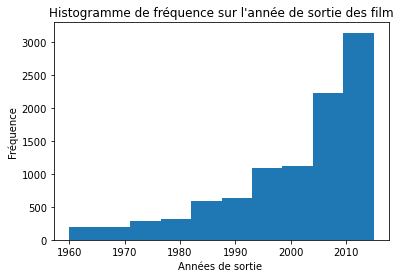

In [42]:
#distribution des années de réalisation
df['release_year'].plot(kind='hist')
plt.title ('Histogramme de fréquence sur l\'année de sortie des film')
plt.xlabel ('Années de sortie ')
plt.ylabel ('Fréquence')
plt.show ()

**Remarque**: On a plus e films produit de l'année 2000 à l'année 2010

In [36]:
# Voyonns la corrélation entre la popularité et l'année de réalisation.
df.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.156931,0.803002,0.237903,0.110241,0.505643,0.606589
runtime,0.156931,1.000000,0.184474,0.190529,-0.134131,0.249521,0.198500
vote_count,0.803002,0.184474,1.000000,0.278887,0.124191,0.580584,0.704121
vote_average,0.237903,0.190529,0.278887,1.000000,-0.138578,0.108751,0.213767
release_year,0.110241,-0.134131,0.124191,-0.138578,1.000000,0.035472,-0.056651
budget_adj,0.505643,0.249521,0.580584,0.108751,0.035472,1.000000,0.640974
revenue_adj,0.606589,0.198500,0.704121,0.213767,-0.056651,0.640974,1.000000


**Remarque**: La corrélation entre la popularité(popularity) et l'année de realisation(release_year) est de 0,110241, donc on peut dire que la popularité et l'année de réalisation ne sont pas fortement corrélés.

In [ ]:
#Utilisons les nuages de points pour visualiser ces variables sont corrélées entre elles ou non 
#et avoir une idée sur les valerurs abbérantes
#Mais tou d'abord nous allons définir une fonction nommée (my_scatters) pour ne pas repeter les même codes à chaque fois

def my_scatters(col1, col2, lab0, lab1, lab2):
    graphe=df.plot(x=col1, y=col2, title=lab0, xlabel=lab1, ylabel=lab2, kind='scatter', figsize =(7,6))
    return graphe

<AxesSubplot:title={'center':"Nuage de points de la popularité du film et l'année de réalisation du film"}, xlabel='Popularité du film', ylabel='Année de réalisation du film'>

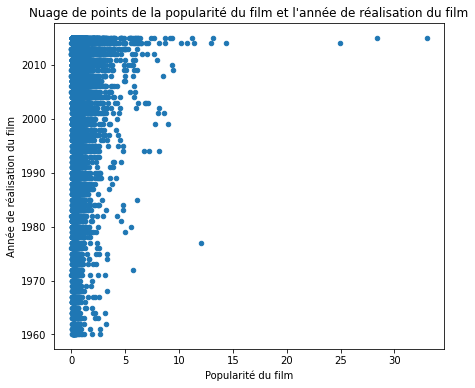

In [44]:
#Nuage de points de la popularité du film et l'année de réalisation du film
my_scatters('popularity','release_year','Nuage de points de la popularité du film et l\'année de réalisation du film',
            'Popularité du film','Année de réalisation du film')

**Discution sur le graphique:** Nous avons choisi ici de faire le nuage de point entre l'année de réalisation du film en fonction de la popularité du film parceque on veut voir d'une façon visuelle la corrélation entre ces deux variables. 

**Nos remarques se confirment**: On peut donc conclure que c'est pas l'année de réalisation qui rens populaire un film.

In [39]:
df.groupby(['genres_rcd'])['popularity'].mean()

genres_rcd
Action             0.875259
Adventure          1.277373
Animation          0.892788
Comedy             0.571626
Crime              0.719750
Documentary        0.208784
Drama              0.586798
Family             0.783861
Fantasy            0.911306
Foreign            0.232168
History            0.839363
Horror             0.487790
Music              0.523559
Mystery            0.621116
Romance            0.786560
Science Fiction    1.150894
TV Movie           0.267006
Thriller           0.691054
War                0.789277
Western            0.690646
Name: popularity, dtype: float64

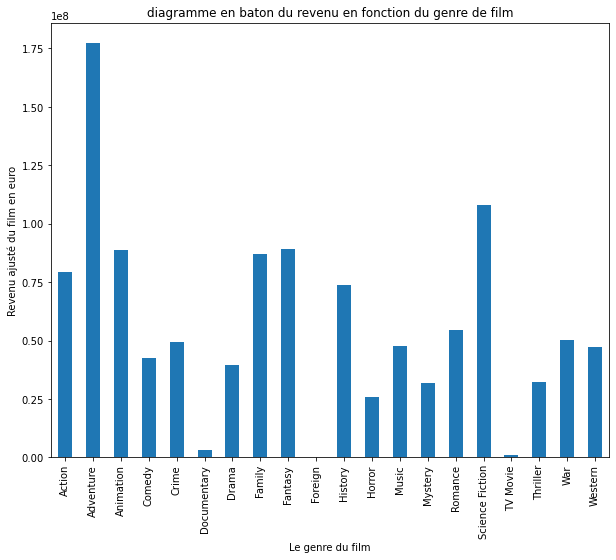

In [47]:
df.groupby(['genres_rcd'])['revenue_adj'].mean().plot(kind='bar',figsize =(10,8))
plt.title ('diagramme en baton du revenu en fonction du genre de film')
plt.xlabel ('Le genre du film')
plt.ylabel ('Revenu ajusté du film en euro')
plt.show ()

**Remarque**: Nous avnos choisi le diagramme en bar ici parcequ'il nous permet de voir diretement les genres de films qui un plus grand revenu. Nous pouvons distinguer à l'aide de ce visuel que les films d'aventures, d'action, de sciences fictions, les desins animés, les films de famille et les films fantastiques sont ceux qui engendrent le plus de revenus.

In [50]:
df.groupby(['genres_rcd'])['release_year'].mean()

genres_rcd
Action             1999.093243
Adventure          1998.323636
Animation          2004.445402
Comedy             2000.352180
Crime              1999.024931
Documentary        2007.736059
Drama              2001.457323
Family             2003.742188
Fantasy            1999.047431
Foreign            2003.166667
History            2003.102564
Horror             2000.499414
Music              2001.212500
Mystery            1999.542373
Romance            2003.534161
Science Fiction    2000.832487
TV Movie           2003.822581
Thriller           2005.383966
War                1998.947368
Western            1986.690476
Name: release_year, dtype: float64

<AxesSubplot:title={'center':'Nuage de points entre le genre et la populatité du film'}, xlabel='Popularité du film', ylabel='Le genre du film'>

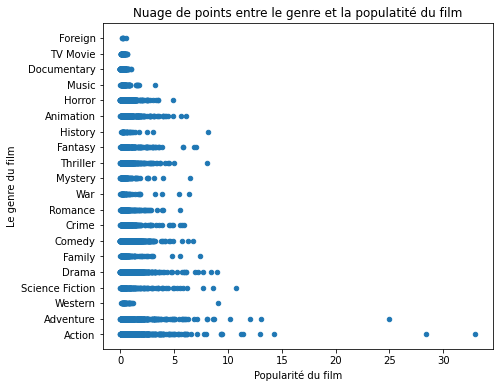

In [45]:
#Nuage de points entre le genre et la populatité du film
my_scatters('popularity','genres_rcd','Nuage de points entre le genre et la populatité du film',
            'Popularité du film','Le genre du film')

> le nuage de point nous montre que la popularité ne dépend pas du genre du film car ces deux variables ne sont pas corrélées 

<AxesSubplot:title={'center':"Nuage de points entre le genre et l'année de réalisation du film"}, xlabel="L'année de réalisation du film", ylabel='Le genre du film'>

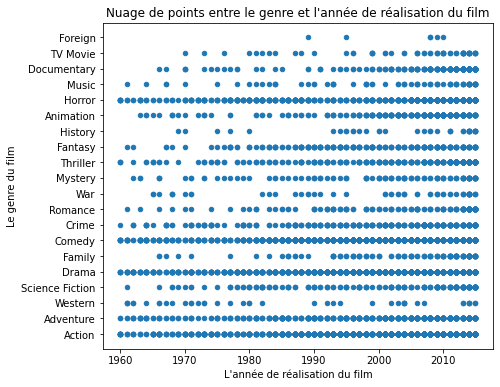

In [46]:
#Nuage de points entre le genre et l'année de réalisation du film
my_scatters('release_year','genres_rcd','Nuage de points entre le genre et l\'année de réalisation du film',
            'L\'année de réalisation du film','Le genre du film')


> Le nuage de point sur la date de réalisation du film et le genre de film montre qu'il y a une forte corrélation entre ces variables

## Conclusions.

> Donc à la question "Quels genres de films sont les plus populaires d’année en année?" Nous reponderons que sur la base des staistiques établis et sur la base des graphiques que nous avons visualiser que le genre de films populaires d'années en années sont du genre : Action, Adventure, Dramatique, Comédie, Thirller, Horror.

### Question de recherche 2:  Quels types de propriétés sont associés aux films qui ont des revenus élevés?

> Avant de commencer à répondre à cette question, nous devons, comme ne savons pas d'avance les propréités qui peuvent être associées au films qui ont un revenus élevés, alors nous allons explorer nos données variable par variables par variables pour voir comment répondre à cette question.

In [59]:
#calculons le revenu moyen :
df['revenue_adj'].mean()

56943516.76267258

In [60]:
#budget moyen
df['budget_adj'].mean()

19379096.418828297

In [61]:
#vote moyen
df['vote_average'].mean()

5.964988254519463

In [62]:
df['genres_rcd'].value_counts()

Drama              2226
Comedy             2087
Action             1480
Horror              853
Adventure           550
Thriller            474
Crime               361
Animation           348
Documentary         269
Fantasy             253
Science Fiction     197
Romance             161
Family              128
Mystery             118
Music                80
TV Movie             62
War                  57
Western              42
History              39
Foreign               6
Name: genres_rcd, dtype: int64

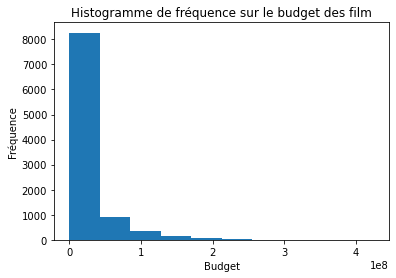

In [20]:
df['budget_adj'].plot(kind='hist')
plt.title ('Histogramme de fréquence sur le budget des film')
plt.xlabel ('Budget')
plt.ylabel ('Fréquence')
plt.show ()

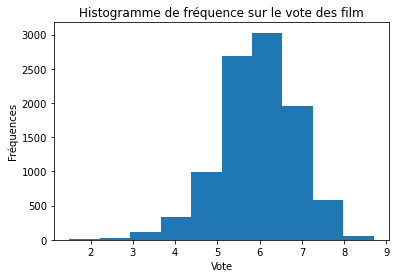

In [21]:
df['vote_average'].plot(kind='hist')
plt.title ('Histogramme de fréquence sur le vote des film')
plt.xlabel ('Vote')
plt.ylabel ('Fréquences')
plt.show ()

## Commentaires

> Au vue des statistiques que nous venons d'établire et les graphes que nous avons tracés, le revenu moyen des films tourne autours de 56943517 Euro. le budjet aloué aux films tourne autours de 19379096 Euro. Le vote moyen est de 6 et semble être normalement distribué. Ce sont les films du genre Drama, Comedy, Action, Horror qui le plus de succès sur le marché            

> L'étape suivante est de croiser les variablesque nous avons exploré avec le revenu.

In [65]:
# Nous allons commencer par la matrice de corrélation
df.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.156931,0.803002,0.237903,0.110241,0.505643,0.606589
runtime,0.156931,1.000000,0.184474,0.190529,-0.134131,0.249521,0.198500
vote_count,0.803002,0.184474,1.000000,0.278887,0.124191,0.580584,0.704121
vote_average,0.237903,0.190529,0.278887,1.000000,-0.138578,0.108751,0.213767
release_year,0.110241,-0.134131,0.124191,-0.138578,1.000000,0.035472,-0.056651
budget_adj,0.505643,0.249521,0.580584,0.108751,0.035472,1.000000,0.640974
revenue_adj,0.606589,0.198500,0.704121,0.213767,-0.056651,0.640974,1.000000


> **Remarque**: Nous pouvons voir clairement avec la matrice de corrélation qu'il y'a une forte corrélation entre le revenu du films et la popularité, la corrélation est aussi importante entre le revenu et le nombre de vote et enfin le budjet est fortement corrélé avec le revenu.


<AxesSubplot:title={'center':'Nuage de points sur le budget ajusté et le revenu ajusté'}, xlabel='Budget ajusté', ylabel='Revenue ajusté'>

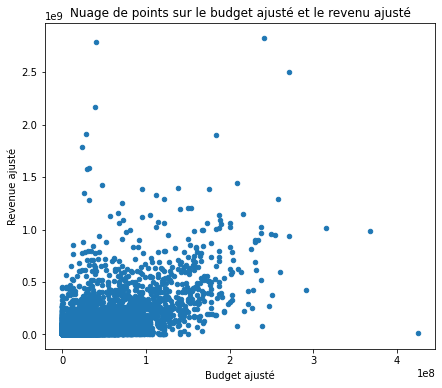

In [43]:
#Nuage de points sur le revenu ajusté et le busget ajusté.
my_scatters('budget_adj','revenue_adj', 'Nuage de points sur le budget ajusté et le revenu ajusté',
            'Budget ajusté', 'Revenue ajusté')

Nous pouvons voir qu'il y a une forte corrélation entre le budget ajusté et le revenu ajusté cépendant on remarque que il y a certaint budgets et revenus qui sortent du commun.  

<AxesSubplot:title={'center':'Nuage de points sur la popularité du film et le revenu ajusté'}, xlabel='Popularité du film', ylabel='Revenue ajusté'>

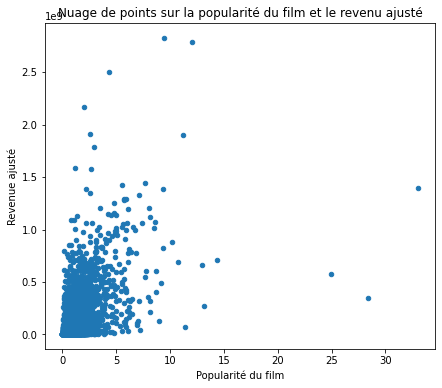

In [47]:
#Nuage de points sur la popularité et le revenu Ajusté
my_scatters('popularity','revenue_adj', 'Nuage de points sur la popularité du film et le revenu ajusté',
            'Popularité du film', 'Revenue ajusté')

On peut également remarque aussi que il y a une corrélation significative entre le fait que le film soit populaire et son revenu

<AxesSubplot:title={'center':'Nuage de points sur le nombre de vote et le revenu ajusté'}, xlabel='Nombre de Vote', ylabel='Revenue ajusté'>

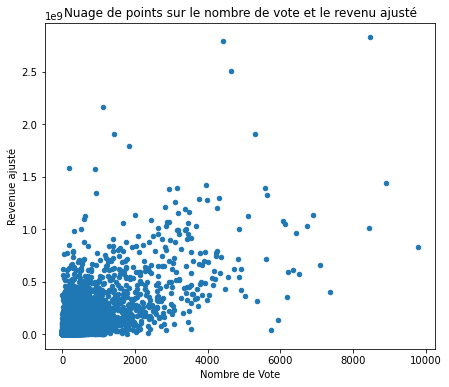

In [50]:
#Nuage de points sur le nombre de vote et le revenu ajusté
my_scatters('vote_count','revenue_adj', 'Nuage de points sur le nombre de vote et le revenu ajusté',
            'Nombre de Vote', 'Revenue ajusté')

On remarque que le nombre de vote peut toutes fois influencer le revenu du film

> **Commentaires**:
Ces nuages de points ne fons que nous confirmer que il y'a une forte corrélation entre le revenu et le nombre de vote ainsi que la popularité et le budget.

> Nous pouvons faire une petite conclusion en disant que les types de propriétés qui sont associés aux films qui ont des revenus élevés sont : le nombre de vote (vote_count), la popularité du film (Popularity) et le budget.

<a id='conclusions'></a>
## Conclusions

>**Dans cette étude, Nous avons Analysé les données du site TMDB de films repertorient les informations sur les films produits entre 1960 et 2015. Cet ensemble de données contient des informations sur 10 000 films collectés à partir de The Movie Database (TMDb), y compris les évaluations des utilisateurs et les revenu.**

>**Nous avons principalement étudié 2 questions. La première était de savoir le genres de films qui sont les plus populaires d’année en année et la seconde question concernait les types de propriétés  associés aux films qui ont des revenus élevés.**

>**Nous pouvons conclure pour la première question que sur la base des staistiques établis et sur la base des graphiques que nous avons visualiser que les films d'action, les films d'aventure, les films du genre dramatique, ceux du genre comiques, et les films d'horreur sont les plus populaires sur le marchées et sont ceux qui ont le plus de succès car ils sont les plus nombreux à être produits par les compagnies de production.**

>**A la deuxième question toujous sur la base des stataistiques établies, nous pouvons conclure que les films qui ont un revenu élevé on également un nombre de vote élevé, quand le film deviens de plus en plus populaire son revenu augmente, nous povons conclure également que plus on met de grand moyens c'est-à-dire quand on met un grand budget dans la réalisation d'un film ce film rapport beaucoup mais nous pouvons être flexible en disant que cela ne fait pas l'unanimité car on peut toutes fois investir beaucoup dans un film et qu'il n'apporte rien du tout.**

### Limites rencontrées 
>**Lors de notre analyse, nous avons voulus savoir si le fait qu'un acteur donné participe à la réalisation d'un film rend ce dernier populaire autrement dit, nous avons voulus voir le lien qui existe entre l'équipe du casting et la popularité du film mais quand nous avons calculé les statistiques et vusualiser les données, les résultats n'étaitent pas parlant.**

